In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [2]:
# CITY = 'beijing'
CITY = 'shanghai'

In [3]:
host_df = pd.read_csv('data/{}/host.csv'.format(CITY))
room_df = pd.read_csv('data/{}/room.csv'.format(CITY))
best_room_df = pd.read_csv('data/{}/best_room.csv'.format(CITY))

In [4]:
def plot_translate(raw_room_df: pd.DataFrame):
    room_df = raw_room_df.copy(deep=True)
    trans_dict = {
        'Entire home/apt': '套房',
        'Private room':'单间',
        'Shared room':'共享'
    }
    room_df['instant_bookable']=room_df['instant_bookable'].map(lambda x: '不允许' if x=='f' else '允许')
    room_df['host_identity_verified'] = room_df['host_identity_verified'].map(lambda x: '未认证' if x=='f' else '已认证')
    room_df['room_type'] = room_df['room_type'].map(lambda x: trans_dict[x])
    room_df['is_single'] = room_df['is_single'].map(lambda x: '企业房东' if x=='f' else '个人房东')
    return room_df

In [5]:
def get_trans_df(room_df: pd.DataFrame, best_room_df:pd.DataFrame,attr:str):
    # transform_rate = (valid_count / best_count) / (total_count / room_count)
    valid_count = best_room_df[attr].value_counts() # count of attr in best rooms
    best_count = len(best_room_df) # count of best rooms
    total_count = room_df[attr].value_counts() # count of attr in all rooms
    room_count = len(room_df) # count of all rooms
    trans_df = valid_count * room_count / (best_count * total_count)
    trans_df = trans_df.sort_values(ascending=False).dropna(axis=0,how='any')
    return trans_df

In [6]:
def get_plot_elem(trans_df:pd.DataFrame, attr:str):
    x= ['{}'.format(num) for num in trans_df.index]
    y1 = [] # count of est rooms
    for name in trans_df.index:
        y1.append(len(best_room_df[best_room_df[attr]==name]))
    y2 = trans_df.values.tolist()
    return x, y1, y2

In [7]:
def plot_transfer(x, y1, y2, var_name_list: list, xlabel: str, ylabel_list:list, ylim1:list=[0,110], ylim2:list=[0, 3.5],x_rotation:int=45):
    fig = plt.figure()

    ax1 = fig.add_subplot(111)
    ax1.bar(x, y1,label=var_name_list[0],color='c')
    ax1.set_ylim(ylim1)
    ax1.set_ylabel(ylabel_list[0])
    plt.legend(loc=2)
    plt.xlabel(xlabel)
    plt.xticks(rotation=x_rotation)

    ax2 = ax1.twinx()
    ax2.plot(x, y2, '-p', label=var_name_list[1])
    ax2.set_ylim(ylim2)
    ax2.set_ylabel(ylabel_list[1])

    y3 = [1] * len(x)
    ax2.plot(x, y3,'--')
    plt.legend(loc=1)

In [8]:
def analyse_trans(room_df: pd.DataFrame, best_room_df: pd.DataFrame, attr: str, ylim1:list=[0,110], ylim2:list=[0, 3.5], rotation:int=45):
    attr_dict = {
        'neighbourhood': '行政区划',
        'accommodates': '房间容量',
        'room_type': '房间类型',
        'bedrooms': '卧室数量',
        'beds': '床数量',
        'instant_bookable': '即时预订',
        'is_single': '房东类型',
        'host_identity_verified': '房东认证情况',
        'host_response_rate': '房东评论回复率'
    }
    trans_df = get_trans_df(room_df, best_room_df, attr)
    x, y1, y2 = get_plot_elem(trans_df, attr)
    plot_transfer(x, y1, y2, ['房源数','转化率'],attr_dict.get(attr,attr),['优质房源数（个）','优质房源转化系数'],ylim1, ylim2,x_rotation=rotation)

In [9]:
best_room_df

,room_id,host_id,neighbourhood,name,latitude,longitude,room_type,accommodates,bedrooms,beds,instant_bookable,first_review,last_review,number_of_reviews,review_scores_rating,price
0,33559965,194403560,嘉定区,Cara&Hana的天空之城11号线嘉定新城 直达迪士尼落地窗270度绝美黄昏夜景近保利大剧...,31.32158,121.26038,Private room,4,1,1,f,2019-04-13,2021-02-23,69,100.0,1730.45
1,19186432,23598891,崇明区,"【五星推荐超赞房东】 整栋精品北欧日式别墅,花园烧烤、阳光房、棋牌室、山地车、4卧4卫",31.46287,121.81946,Entire home/apt,8,4,5,t,2017-09-17,2021-02-16,107,100.0,15672.00
2,22738841,26445288,崇明区,【超五星民宿】“DV翡冷翠1#·虫鸣渔村”长江边/近网红丁坝/独幢2房2厅混搭法式老洋房般的内饰,31.49923,121.71635,Entire home/apt,5,2,3,f,2018-02-24,2021-02-06,147,100.0,5654.98
3,24583705,96619451,崇明区,【五星好评】崇明【品闲居民宿】北欧风独栋别墅木屋 泳池、垂钓、烧烤、亲子最多7大3小,31.58499,121.69135,Entire home/apt,10,4,4,t,2018-05-26,2021-01-25,72,100.0,14170.10
4,18727314,107360935,徐汇区,Only for Ms. Traveling alone,31.15976,121.42391,Shared room,1,1,1,t,2017-06-04,2021-01-12,55,100.0,711.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,37043863,259537110,黄浦区,近商圈淮海中路/新天地/思南公馆/田子坊/环贸iapm/外滩/城隍庙/核心地段。,31.21543,121.46469,Entire home/apt,2,1,1,f,2019-08-01,2021-02-20,71,100.0,1299.47
126,37346781,243075780,黄浦区,市中心/豫园城隍庙 /新天地/人广/可看夜景/老西门双地铁口1分钟/温馨超大次卧/欢迎长租/...,31.21883,121.48435,Private room,3,1,1,t,2019-08-13,2020-12-18,75,100.0,1240.70
127,38666697,72854219,黄浦区,【aesthetic】全江景私密套房 俯瞰世博南外滩夜景全景 80平北欧简约2居室,31.20274,121.49326,Entire home/apt,4,2,2,t,2019-10-01,2021-02-22,59,100.0,3036.45
128,43879002,156367872,黄浦区,Old Fashion-石库门|新天地旁|淮海中路|高清投影|独门独院|步行200米地铁|时尚地标,31.21839,121.47482,Entire home/apt,2,1,1,t,2020-06-24,2021-02-05,53,100.0,2807.90


In [10]:
room_df = pd.merge(room_df, host_df, on='host_id')
room_df = plot_translate(room_df)
best_room_df = pd.merge(best_room_df, host_df, on='host_id')
best_room_df = plot_translate(best_room_df)

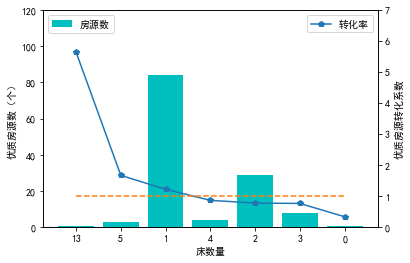

In [11]:
analyse_trans(room_df, best_room_df, 'beds',ylim1=[0,120],ylim2=[0,7], rotation=0)

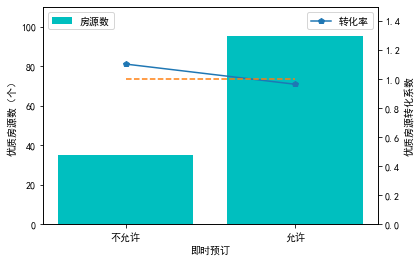

In [12]:
analyse_trans(room_df,best_room_df, 'instant_bookable',ylim2=[0,1.5], rotation=0)

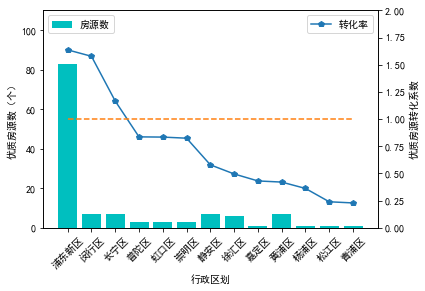

In [13]:
analyse_trans(room_df, best_room_df, 'neighbourhood',ylim2=[0,2])

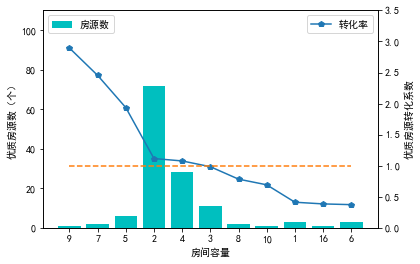

In [14]:
analyse_trans(room_df,best_room_df,'accommodates',ylim2=[0,3.5],rotation=0)

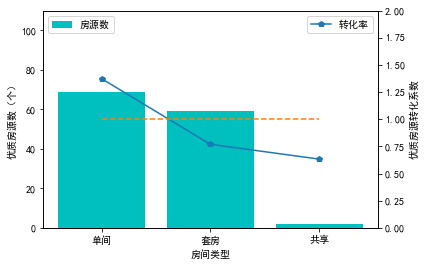

In [15]:
analyse_trans(room_df,best_room_df,'room_type', ylim2=[0,2],rotation=0)

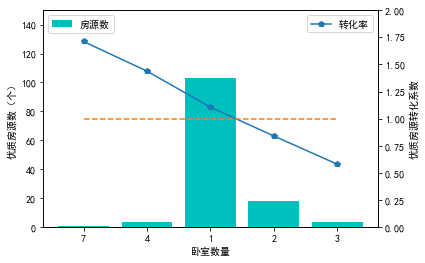

In [16]:
analyse_trans(room_df, best_room_df, 'bedrooms',ylim1=[0,150],ylim2=[0,2], rotation=0)

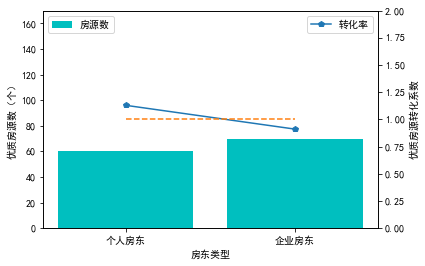

In [17]:
analyse_trans(room_df, best_room_df, 'is_single',ylim1=[0,170],ylim2=[0,2],rotation=0)

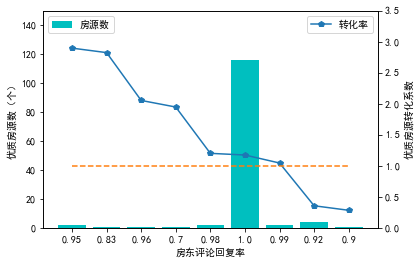

In [18]:
analyse_trans(room_df, best_room_df, 'host_response_rate',ylim1=[0,150],ylim2=[0,3.5],rotation=0)

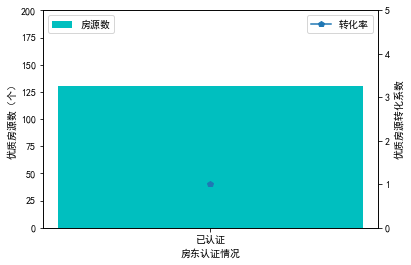

In [19]:
analyse_trans(room_df, best_room_df,'host_identity_verified',ylim1=[0, 200],ylim2=[0,5],rotation=0)